# Вариант №10

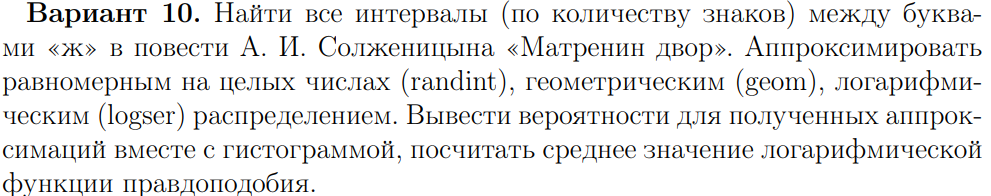

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import randint, geom, logser
from scipy.stats import norm
import statsmodels
from math import sqrt, log, exp, pi

In [12]:
file = open('/content/drive/MyDrive/Colab Notebooks/Анализ данных на Python/matren.txt_Ascii.txt', 'r', encoding='cp1251')
text = file.read()

In [13]:
# подсчитываем количество символов между буквами 'ж', сохраняем данные в np массиве
data = []
count = 0
for i in text:
  if i == 'ж':
    data.append(count)
    count = 0
  else:
    count += 1

data.sort()
data = np.array(data)
x = np.arange(1, max(data) + 1)

[0.         0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248
 0.00142248 0.00142248 0.00142248 0.00142248 0.00142248 0.0014

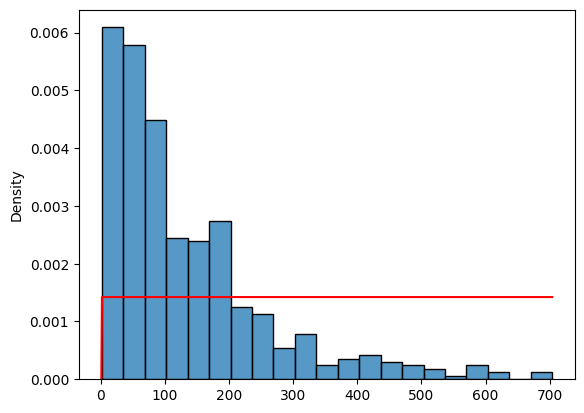

Среднее значение логарифма правдоподобия: -6.555356891810681


In [14]:
# аппроксимация равномерным на целых числах (randint)
randint_app = randint.pmf(x, min(data), max(data) + 1)
print(randint_app)

sns.histplot(data, stat='density')
plt.plot(x, randint_app, color='red')
plt.show()

u = sum(randint.logpmf(data, min(data), max(data) + 1)) / len(data)
print('Среднее значение логарифма правдоподобия:', u)

[7.54518072e-03 7.48825097e-03 7.43175076e-03 7.37567686e-03
 7.32002605e-03 7.26479513e-03 7.20998093e-03 7.15558033e-03
 7.10159018e-03 7.04800740e-03 6.99482891e-03 6.94205166e-03
 6.88967263e-03 6.83768880e-03 6.78609720e-03 6.73489487e-03
 6.68407887e-03 6.63364629e-03 6.58359423e-03 6.53391982e-03
 6.48462022e-03 6.43569259e-03 6.38713412e-03 6.33894204e-03
 6.29111358e-03 6.24364599e-03 6.19653655e-03 6.14978256e-03
 6.10338134e-03 6.05733023e-03 6.01162658e-03 5.96626777e-03
 5.92125120e-03 5.87657429e-03 5.83223447e-03 5.78822921e-03
 5.74455597e-03 5.70121226e-03 5.65819558e-03 5.61550348e-03
 5.57313349e-03 5.53108319e-03 5.48935017e-03 5.44793203e-03
 5.40682639e-03 5.36603091e-03 5.32554324e-03 5.28536105e-03
 5.24548205e-03 5.20590394e-03 5.16662445e-03 5.12764134e-03
 5.08895236e-03 5.05055529e-03 5.01244794e-03 4.97462811e-03
 4.93709365e-03 4.89984238e-03 4.86287219e-03 4.82618094e-03
 4.78976653e-03 4.75362687e-03 4.71775990e-03 4.68216355e-03
 4.64683578e-03 4.611774

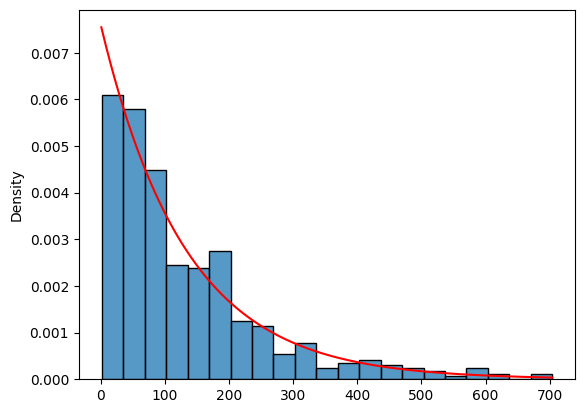

Среднее значение логарифма правдоподобия: -5.883064119767882


In [15]:
# аппроксимация геометрическим распределением (geom)
geom_app = geom.pmf(x, 1 / np.mean(data))
print(geom_app)

sns.histplot(data, stat='density')
plt.plot(x, geom_app, color='red')
plt.show()

u = sum(geom.logpmf(data, 1 / np.mean(data))) / len(data)
print('Среднее значение логарифма правдоподобия:', u)

In [19]:
# поиск параметра p, исходя из среднего значения логарифма правдоподобия для logser (0 < p < 1)
p = 0
ma = -10000
real_p = 0
for i in range(999):
    p += 0.01
    u = sum(logser.logpmf(data, p)) / len(data)
    if (u > ma):
        m = u
        real_p = p

print(real_p, m)

0.9900000000000007 -7.2548301687835375


[2.14975769e-01 1.06413005e-01 7.02325836e-02 5.21476933e-02
 4.13009731e-02 3.40733028e-02 2.89136312e-02 2.50464331e-02
 2.20408611e-02 1.96384072e-02 1.76745665e-02 1.60396691e-02
 1.46577899e-02 1.34746969e-02 1.24506199e-02 1.15557316e-02
 1.07672229e-02 1.00673534e-02 9.44211775e-03 8.88031174e-03
 8.37286536e-03 7.91235776e-03 7.49265879e-03 7.10866002e-03
 6.75607049e-03 6.43125940e-03 6.13113397e-03 5.85304325e-03
 5.59470203e-03 5.35412984e-03 5.12960181e-03 4.91960874e-03
 4.72282439e-03 4.53807861e-03 4.36433503e-03 4.20067247e-03
 4.04626937e-03 3.90039071e-03 3.76237689e-03 3.63163429e-03
 3.50762727e-03 3.38987121e-03 3.27792662e-03 3.17139401e-03
 3.06990940e-03 2.97314052e-03 2.88078339e-03 2.79255940e-03
 2.70821270e-03 2.62750796e-03 2.55022832e-03 2.47617361e-03
 2.40515882e-03 2.33701265e-03 2.27157630e-03 2.20870231e-03
 2.14825362e-03 2.09010262e-03 2.03413038e-03 1.98022592e-03
 1.92828557e-03 1.87821235e-03 1.82991546e-03 1.78330980e-03
 1.73831552e-03 1.694857

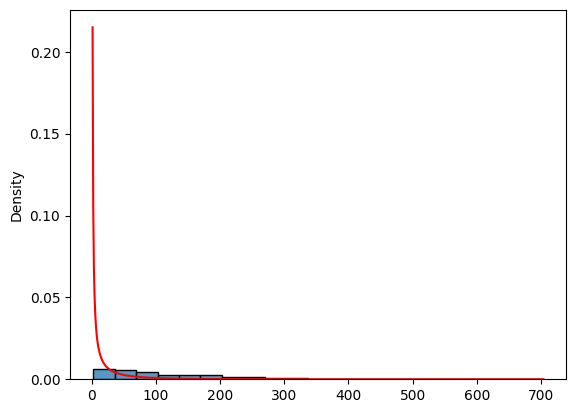

Среднее значение логарифма правдоподобия: -7.2548301687835375


In [17]:
# аппроксимация логарифмическим распределением (logser)
logser_app = logser.pmf(x, real_p)
print(logser_app)

sns.histplot(data, stat='density')
plt.plot(x, logser_app, color='red')
plt.show()

u = sum(logser.logpmf(data, real_p)) / len(data)
print('Среднее значение логарифма правдоподобия:', u)